In [1]:
# !gdown https://drive.google.com/u/0/uc?id=1O4YR4UBatOLnaP4gMHbmFw7UJvhhxFwq&export=download

In [2]:
# !gdown https://drive.google.com/u/0/uc?id=1-7aMdKW4KcCKLwoUKC3XxdIwfIKkzwx6&export=download

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip -q /content/drive/MyDrive/Ds2/test_data.zip
!unzip -q /content/drive/MyDrive/Ds2/train_data.zip

In [5]:
train_dir = '/content/train_data'
test_dir = '/content/test_data'

In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg


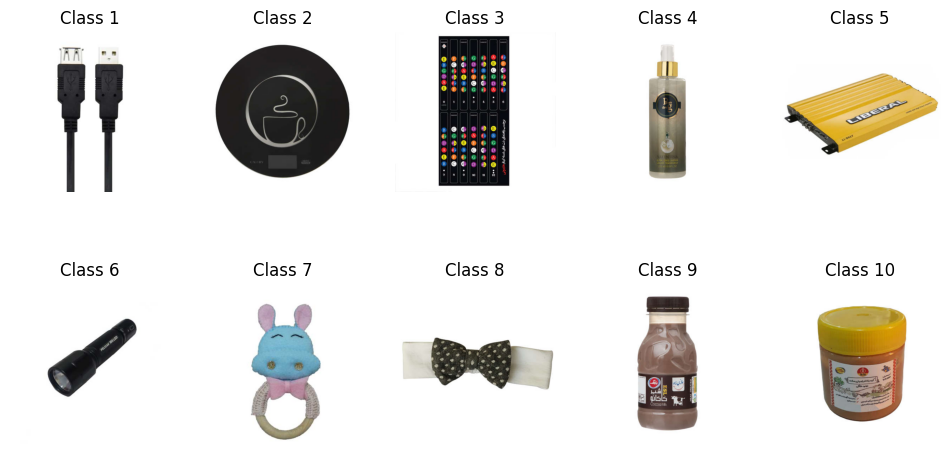

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
n = np.random.randint(0,400)
for i in range(1, 11):
    subdir = os.path.join(train_dir, str(i))
    pic_files = [f for f in os.listdir(subdir) if f.endswith('.jpg')]
    if pic_files:
        img = mpimg.imread(os.path.join(subdir, pic_files[n]))
        ax = axes[i - 1]
        ax.imshow(img)
        ax.set_title(f'Class {i}')
        ax.axis('off')

In [8]:
print(img.shape)

(456, 456, 3)


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152 , EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import load_model

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=False,
    fill_mode='nearest',
    validation_split=0.3,
    preprocessing_function = preprocess_input

)

In [20]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

Found 6994 images belonging to 10 classes.
Found 2996 images belonging to 10 classes.


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [22]:
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
loaded_model = load_model('/content/drive/MyDrive/Ds2/Models/Model-EffNetB7-256-17Epoch-.keras')

In [25]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
loaded_model.fit(
    train_generator,
    batch_size=32,
    epochs=10,
    validation_data=validation_generator,
    )

Epoch 1/10
219/219 [==============================] - 273s 1s/step - loss: 0.1456 - accuracy: 0.9551 - val_loss: 1.7437 - val_accuracy: 0.6051
Epoch 2/10
219/219 [==============================] - 237s 1s/step - loss: 0.1290 - accuracy: 0.9603 - val_loss: 1.7545 - val_accuracy: 0.6138
Epoch 3/10
219/219 [==============================] - 244s 1s/step - loss: 0.1247 - accuracy: 0.9610 - val_loss: 1.7637 - val_accuracy: 0.6168
Epoch 4/10
219/219 [==============================] - 255s 1s/step - loss: 0.1075 - accuracy: 0.9673 - val_loss: 1.7831 - val_accuracy: 0.6208
Epoch 5/10
219/219 [==============================] - 260s 1s/step - loss: 0.1062 - accuracy: 0.9693 - val_loss: 1.8317 - val_accuracy: 0.6071
Epoch 6/10
219/219 [==============================] - 254s 1s/step - loss: 0.1026 - accuracy: 0.9681 - val_loss: 1.8327 - val_accuracy: 0.6091
Epoch 7/10
219/219 [==============================] - 251s 1s/step - loss: 0.0852 - accuracy: 0.9725 - val_loss: 1.8465 - val_accuracy: 0.6135

In [27]:
loaded_model.save("Model-EffNetB7-256-17Epoch-.keras")